<a href="https://colab.research.google.com/github/YinGuoX/Deep_Learning_Keras_WithDeeplizard/blob/master/20_Data_Augmentation_With_TensorFlow's_Keras_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation With TensorFlow's Keras API
在本集中，我们将演示如何使用TensorFlow的Keras API在图像上使用数据扩增。

当根据修改现有数据创建新数据时，就会发生数据扩增。在我们跳到代码之前，我们将接触到数据增强的概念，但要更全面地介绍这个概念，请查看深度学习基础课程中的数据增强章节。

在本节中，我们将使用的数据将是图像。 特别是对于图像数据，数据增强可能包括诸如水平或垂直翻转图像，旋转图像，放大或缩小，裁切或改变颜色之类的事情。

## 1.为什么需要数据扩增
对于初学者来说，它可以帮助我们获得更多的训练数据。也许我们有一个小的训练集，或者我们想让我们的训练集变大。我们可以通过扩充现有数据，然后将这些数据添加到训练集来实现这一点。

使用数据扩充的另一个原因是可以减少过拟合。

## 2.使用Keras API 进行数据扩增
现在，让我们看看如何使用Keras进行数据扩充。

首先，我们导入将要使用的所有库。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

接下来，我们将使用从[TensorFlow文档](https://www.tensorflow.org/tutorials/images/classification#visualize_training_images)获得的plotImages（）函数在Jupyter笔记本中绘制处理后的图像。

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

现在我们将这个名为gen的变量定义为ImageDataGenerator。所有被传递的参数都是我们告诉Keras增强图像的不同方式。

In [ ]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

查看[TensorFlow API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)，了解我们指定的每种增强技术所使用的单位。 例如，rotation_range以度为单位，而width_shift_range以图像宽度的一小部分为单位。


接下来，我们从磁盘中随机选择一个狗的图像。

In [ ]:
# 在colab上使用的云端数据
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/My Drive/DeepLearning_AI_Course/Deeplizard/Keras - Python Deep Learning Neural Network API/Data/dogs-vs-cats"

# 更改当前系统的路径
os.chdir(path)
# 显示当前路径的文件夹名字
print(os.listdir())

# 获得当前路径
os.getcwd()

['Dog', 'Cat', 'train', 'valid', 'test']


'/content/drive/My Drive/DeepLearning_AI_Course/Deeplizard/Keras - Python Deep Learning Neural Network API/Data/dogs-vs-cats'

In [ ]:
chosen_image = random.choice(os.listdir('./Dog'))
print(chosen_image)

11938.jpg


然后，我们创建一个名为image_path的变量，并将其设置为所选图像在磁盘上的相对位置。

In [ ]:
image_path = './Dog/'+chosen_image
print(image_path)

./Dog/11938.jpg


注意，要继续下面的内容，您需要在您的机器上指向一个有效的位置和图像文件

接下来，我们将通过使用plt.imread（）从磁盘读取图像并传入image_path来获得图像。 我们还扩大尺寸，以使图像与以后的使用方式兼容。

In [ ]:
image = np.expand_dims(plt.imread(image_path),0)
print(type(image))
print(image.shape)
print(image)

<class 'numpy.ndarray'>
(1, 336, 448, 3)
[[[[40 26 13]
   [42 30 16]
   [50 40 28]
   ...
   [30 18  6]
   [23 13  1]
   [24 14  2]]

  [[40 26 13]
   [46 34 20]
   [56 46 34]
   ...
   [30 17  8]
   [23 13  1]
   [24 14  2]]

  [[38 24 11]
   [49 37 25]
   [60 50 38]
   ...
   [31 18  9]
   [24 14  4]
   [25 15  3]]

  ...

  [[24 23 18]
   [24 23 18]
   [25 24 19]
   ...
   [38 34 22]
   [38 34 22]
   [37 33 21]]

  [[25 24 19]
   [25 24 19]
   [25 24 19]
   ...
   [37 33 21]
   [37 33 21]
   [37 33 21]]

  [[25 24 19]
   [26 25 20]
   [26 25 20]
   ...
   [38 34 22]
   [38 35 20]
   [38 35 20]]]]


现在，我们来绘制图像，看看原始图像是什么样的。

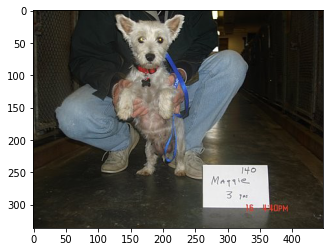

In [ ]:
plt.imshow(image[0])

接下来，我们将从原始图像生成一批增强图像。

In [ ]:
aug_iter = gen.flow(image)
print(type(aug_iter))
print(aug_iter)

<class 'tensorflow.python.keras.preprocessing.image.NumpyArrayIterator'>


flow()函数接受numpy数据，并生成批量增强数据。现在我们将提取出200个增强图像的样本。

In [ ]:

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(20)]
# print(aug_images)

现在我们将绘制数据扩增的图像。

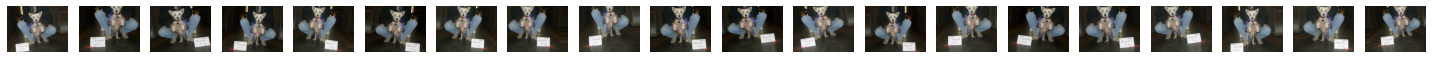

In [ ]:
plotImages(aug_images)

这些是根据我们先前传递给ImageDataGenerator的参数从原始图像扩展的十个图像。

我们可以看到有些图像是水平翻转的，有些图像有轻微的颜色变化，有些图像向左或向右倾斜，有些图像向下或向上略微移动

## 3.保存扩增数据
注意，如果要保存这些图像，以便可以将它们添加到训练集中，然后添加到gen.flow（），则还应指定参数save_to_dir并将其设置为等于磁盘上的有效位置。

您可以选择指定前缀，以在保存的扩展图像的文件名之前添加前缀，也可以选择将文件类型指定为“ png”或“ jpeg”图像。 默认为“ png”。

In [ ]:
print(os.listdir())
print(os.getcwd())

['Dog', 'Cat', 'train', 'valid', 'test']
/content/drive/My Drive/DeepLearning_AI_Course/Deeplizard/Keras - Python Deep Learning Neural Network API/Data/dogs-vs-cats


In [ ]:
aug_iter = gen.flow(image,save_to_dir='./Dog',save_prefix='aug-image-',save_format='jpeg')
# aug_iter = gen.flow(image, save_to_dir=os.getcwd(), save_prefix='aug-image-', save_format='jpeg')
print(type(aug_iter))

<class 'tensorflow.python.keras.preprocessing.image.NumpyArrayIterator'>


请注意，如果要从保存到磁盘上的组织目录结构的数据中生成批量增强数据，则还可以使用ImageDataGenerator.flow_from_directory（）而不是ImageDataGenerator.flow（）。 请参阅前面的情节，在其中我们介绍了此功能并显示了正确的目录结构。


希望现在您了解什么是数据增强，为什么要使用它以及如何在Keras中使用它。